In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("flight_price_prediction_dataset.csv")
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,07/02/2022
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,07/02/2022
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,07/02/2022
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,07/02/2022
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,07/02/2022
...,...,...,...,...,...,...,...,...,...
2295,Jet Airways,Banglore,New Delhi,16:55,07:40 02 Mar,14h 45m,1 stop,26890,27/02/2022
2296,SpiceJet,Kolkata,Banglore,17:10,19:40,2h 30m,non-stop,3841,27/02/2022
2297,Air India,Banglore,New Delhi,10:30,22:55,12h 25m,1 stop,11003,27/02/2022
2298,Vistara,Banglore,Delhi,11:30,14:20,2h 50m,non-stop,5403,27/02/2022


EDA PROCESS

In [3]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
Date_of_Journey    0
dtype: int64

In [4]:
df.dtypes

Airline            object
Source             object
Destination        object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Price               int64
Date_of_Journey    object
dtype: object

In [5]:
df["Price"]=df["Price"].astype(float)

In [6]:
df["Airline"].value_counts()

Jet Airways                          841
IndiGo                               450
Air India                            362
Multiple carriers                    273
SpiceJet                             162
Vistara                              105
Air Asia                              63
GoAir                                 41
Jet Airways Business                   1
Multiple carriers Premium economy      1
Vistara Premium economy                1
Name: Airline, dtype: int64

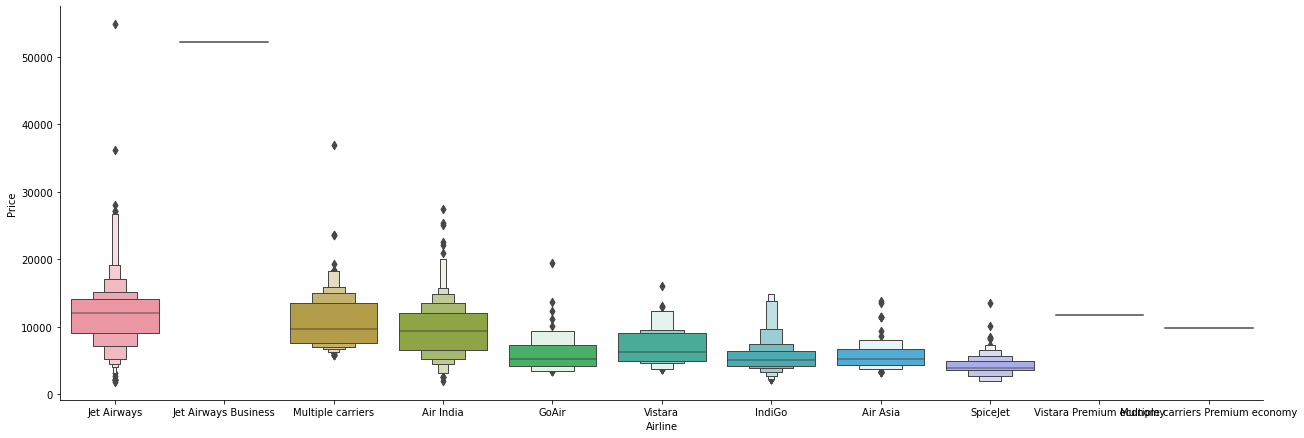

In [7]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)

ENCODING CATEGORICAL OBJECTIVE COLUMNS

In [8]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Price', 'Date_of_Journey'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Airline','Source','Destination','Total_Stops']
for val in list:
    df[val]=le.fit_transform(df[val])
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey
0,3,0,5,22:20,01:10 22 Mar,2h 50m,3,3897.0,07/02/2022
1,1,3,0,05:50,13:15,7h 25m,1,7662.0,07/02/2022
2,4,2,1,09:25,04:25 10 Jun,19h,1,13882.0,07/02/2022
3,3,3,0,18:05,23:30,5h 25m,0,6218.0,07/02/2022
4,3,0,5,16:50,21:35,4h 45m,0,13302.0,07/02/2022
...,...,...,...,...,...,...,...,...,...
2295,4,0,5,16:55,07:40 02 Mar,14h 45m,0,26890.0,27/02/2022
2296,8,3,0,17:10,19:40,2h 30m,3,3841.0,27/02/2022
2297,1,0,5,10:30,22:55,12h 25m,0,11003.0,27/02/2022
2298,9,0,2,11:30,14:20,2h 50m,3,5403.0,27/02/2022


In [10]:
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])
df["Dep_Time"]=pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"])

In [11]:
df['journey_month']=df['Date_of_Journey'].dt.month
df["journey_day"]=df["Date_of_Journey"].dt.day
df.drop("Date_of_Journey",axis=1,inplace=True)

In [12]:
df['dep_hour']=df['Dep_Time'].dt.hour
df["dep_minute"]=df["Dep_Time"].dt.minute
df.drop("Dep_Time",axis=1,inplace=True)

In [13]:
df['arrival_hour']=df['Arrival_Time'].dt.hour
df["arrival_minute"]=df["Arrival_Time"].dt.minute
df.drop("Arrival_Time",axis=1,inplace=True)

In [14]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,dep_hour,dep_minute,arrival_hour,arrival_minute
0,3,0,5,2h 50m,3,3897.0,7,2,22,20,1,10
1,1,3,0,7h 25m,1,7662.0,7,2,5,50,13,15
2,4,2,1,19h,1,13882.0,7,2,9,25,4,25
3,3,3,0,5h 25m,0,6218.0,7,2,18,5,23,30
4,3,0,5,4h 45m,0,13302.0,7,2,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
2295,4,0,5,14h 45m,0,26890.0,2,27,16,55,7,40
2296,8,3,0,2h 30m,3,3841.0,2,27,17,10,19,40
2297,1,0,5,12h 25m,0,11003.0,2,27,10,30,22,55
2298,9,0,2,2h 50m,3,5403.0,2,27,11,30,14,20


In [15]:
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins
df['Duration_hours']=df.Duration.apply(lambda x:get_duration(x)[0])
df['Duration_mins']=df.Duration.apply(lambda x:get_duration(x)[1])
df.drop(["Duration"], axis = 1, inplace = True)

In [16]:
df

,Airline,Source,Destination,Total_Stops,Price,journey_month,journey_day,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hours,Duration_mins
0,3,0,5,3,3897.0,7,2,22,20,1,10,2,50
1,1,3,0,1,7662.0,7,2,5,50,13,15,7,25
2,4,2,1,1,13882.0,7,2,9,25,4,25,19,0
3,3,3,0,0,6218.0,7,2,18,5,23,30,5,25
4,3,0,5,0,13302.0,7,2,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,4,0,5,0,26890.0,2,27,16,55,7,40,14,45
2296,8,3,0,3,3841.0,2,27,17,10,19,40,2,30
2297,1,0,5,0,11003.0,2,27,10,30,22,55,12,25
2298,9,0,2,3,5403.0,2,27,11,30,14,20,2,50


array([[<AxesSubplot:title={'center':'Airline'}>,
        <AxesSubplot:title={'center':'Source'}>,
        <AxesSubplot:title={'center':'Destination'}>,
        <AxesSubplot:title={'center':'Total_Stops'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'journey_month'}>,
        <AxesSubplot:title={'center':'journey_day'}>,
        <AxesSubplot:title={'center':'dep_hour'}>],
       [<AxesSubplot:title={'center':'dep_minute'}>,
        <AxesSubplot:title={'center':'arrival_hour'}>,
        <AxesSubplot:title={'center':'arrival_minute'}>,
        <AxesSubplot:title={'center':'Duration_hours'}>,
        <AxesSubplot:title={'center':'Duration_mins'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSu

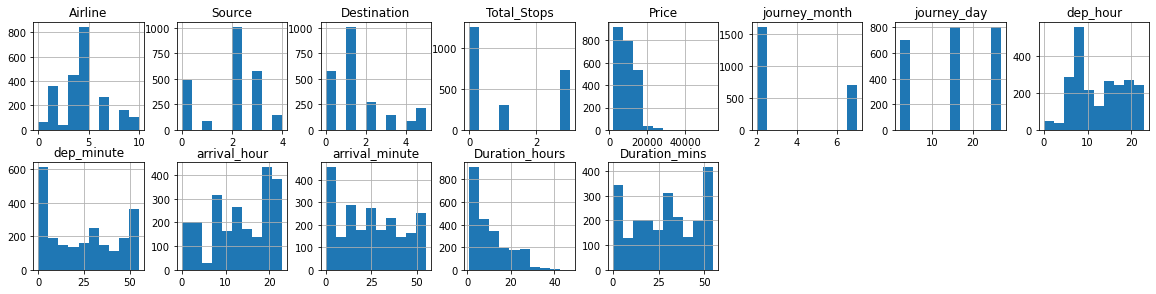

In [17]:
df.hist(figsize=(20,20),grid=True,layout=(8,8))

In [18]:
df.describe()

,Airline,Source,Destination,Total_Stops,Price,journey_month,journey_day,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hours,Duration_mins
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,3.938696,1.915652,1.475217,1.090000,9148.581304,3.521739,15.217391,12.582609,24.519565,13.187826,24.519565,10.147391,28.513043
std,2.209784,1.174922,1.487309,1.346523,4646.847788,2.301154,10.075645,5.796510,18.805616,6.865477,16.544641,8.368083,16.993648
min,0.000000,0.000000,0.000000,0.000000,1840.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,5278.500000,2.000000,2.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,4.000000,2.000000,1.000000,0.000000,8366.500000,2.000000,15.000000,11.500000,25.000000,13.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,3.000000,12609.000000,7.000000,27.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,10.000000,4.000000,5.000000,3.000000,54826.000000,7.000000,27.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [19]:
df.skew()

Airline           0.540711
Source           -0.388549
Destination       1.226355
Total_Stops       0.618030
Price             1.549364
journey_month     0.850975
journey_day      -0.130978
dep_hour          0.120058
dep_minute        0.155679
arrival_hour     -0.321338
arrival_minute    0.122413
Duration_hours    0.879241
Duration_mins    -0.099339
dtype: float64

Airline             AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
Source            AxesSubplot(0.223936,0.799681;0.0824468x0.0803...
Destination       AxesSubplot(0.322872,0.799681;0.0824468x0.0803...
Total_Stops       AxesSubplot(0.421809,0.799681;0.0824468x0.0803...
Price             AxesSubplot(0.520745,0.799681;0.0824468x0.0803...
journey_month     AxesSubplot(0.619681,0.799681;0.0824468x0.0803...
journey_day       AxesSubplot(0.718617,0.799681;0.0824468x0.0803...
dep_hour          AxesSubplot(0.817553,0.799681;0.0824468x0.0803...
dep_minute          AxesSubplot(0.125,0.703298;0.0824468x0.0803191)
arrival_hour      AxesSubplot(0.223936,0.703298;0.0824468x0.0803...
arrival_minute    AxesSubplot(0.322872,0.703298;0.0824468x0.0803...
Duration_hours    AxesSubplot(0.421809,0.703298;0.0824468x0.0803...
Duration_mins     AxesSubplot(0.520745,0.703298;0.0824468x0.0803...
dtype: object

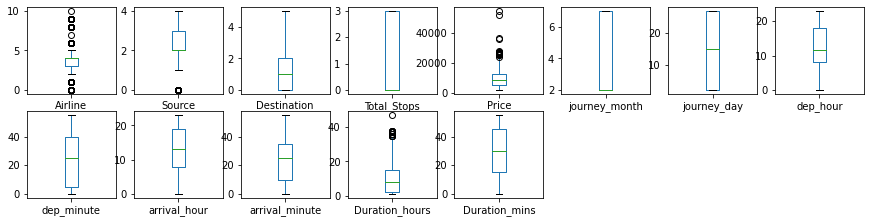

In [20]:
df.plot(kind="box",subplots=True,layout=(8,8),figsize=(15,15))

Z SCORE METHOD

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.42488296, 1.6308048 , 2.37042214, ..., 0.87779013, 0.97383873,
        1.264686  ],
       [1.33014541, 0.92311103, 0.99208614, ..., 0.57551175, 0.37620036,
        0.20677181],
       [0.02774826, 0.07180575, 0.31958448, ..., 0.02904501, 1.05813173,
        1.67822962],
       ...,
       [1.33014541, 1.6308048 , 2.37042214, ..., 1.84271529, 0.22143801,
        0.20677181],
       [2.29090439, 1.6308048 , 0.35291717, ..., 0.27323337, 0.97383873,
        1.264686  ],
       [0.93301071, 0.07180575, 0.31958448, ..., 1.54043691, 0.01761734,
        1.264686  ]])

In [22]:
df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Source,Destination,Total_Stops,Price,journey_month,journey_day,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hours,Duration_mins
0,3,0,5,3,3897.0,7,2,22,20,1,10,2,50
1,1,3,0,1,7662.0,7,2,5,50,13,15,7,25
2,4,2,1,1,13882.0,7,2,9,25,4,25,19,0
3,3,3,0,0,6218.0,7,2,18,5,23,30,5,25
4,3,0,5,0,13302.0,7,2,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,4,2,1,0,14053.0,2,27,19,15,4,25,9,10
2296,8,3,0,3,3841.0,2,27,17,10,19,40,2,30
2297,1,0,5,0,11003.0,2,27,10,30,22,55,12,25
2298,9,0,2,3,5403.0,2,27,11,30,14,20,2,50


In [23]:
df.shape

(2300, 13)

In [24]:
2263/2300

0.9839130434782609

In [25]:
df_new.skew()

Airline           0.540171
Source           -0.402355
Destination       1.246537
Total_Stops       0.601187
Price             0.403907
journey_month     0.845860
journey_day      -0.131949
dep_hour          0.110925
dep_minute        0.166595
arrival_hour     -0.313518
arrival_minute    0.116705
Duration_hours    0.793162
Duration_mins    -0.108557
dtype: float64

BY USING LOG TRANSFORM METHOD

In [27]:
skew=["Airline","Destination","Total_Stops","journey_month","Duration_hours"]
for col in skew:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [28]:
df_new.skew()

Airline           0.540171
Source           -0.402355
Destination       0.269061
Total_Stops       0.454613
Price             0.403907
journey_month     0.845860
journey_day      -0.131949
dep_hour          0.110925
dep_minute        0.166595
arrival_hour     -0.313518
arrival_minute    0.116705
Duration_hours   -0.108632
Duration_mins    -0.108557
dtype: float64

CORRELATION GRAPH

In [29]:
df_new.corr()

,Airline,Source,Destination,Total_Stops,Price,journey_month,journey_day,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hours,Duration_mins
Airline,1.000000,0.033406,-0.000993,-0.029568,-0.051979,0.013078,-0.008196,-0.069147,-0.066885,-0.020168,-0.099709,-0.109377,-0.048765
Source,0.033406,1.000000,-0.631502,-0.230350,0.082428,-0.066857,0.066875,0.064941,-0.033573,0.047561,-0.000248,0.158220,-0.130051
Destination,-0.000993,-0.631502,1.000000,0.359087,-0.214127,0.041946,-0.039938,-0.100677,0.070538,-0.044981,0.017390,-0.366211,0.029170
Total_Stops,-0.029568,-0.230350,0.359087,1.000000,-0.559235,0.026649,-0.034389,0.015852,0.020141,-0.087854,0.187539,-0.726425,0.189408
Price,-0.051979,0.082428,-0.214127,-0.559235,1.000000,-0.026268,0.045202,0.033438,-0.010913,0.023700,-0.114325,0.687332,-0.122580
journey_month,0.013078,-0.066857,0.041946,0.026649,-0.026268,1.000000,-0.868657,0.022605,-0.015088,-0.002442,0.031177,-0.019068,-0.008267
journey_day,-0.008196,0.066875,-0.039938,-0.034389,0.045202,-0.868657,1.000000,-0.037497,0.000693,0.010771,-0.014199,0.031171,0.003909
dep_hour,-0.069147,0.064941,-0.100677,0.015852,0.033438,0.022605,-0.037497,1.000000,-0.002868,-0.018776,0.052064,0.006644,-0.005368
dep_minute,-0.066885,-0.033573,0.070538,0.020141,-0.010913,-0.015088,0.000693,-0.002868,1.000000,0.024662,0.007162,-0.014495,0.107532
arrival_hour,-0.020168,0.047561,-0.044981,-0.087854,0.023700,-0.002442,0.010771,-0.018776,0.024662,1.000000,-0.167149,0.060626,-0.128414


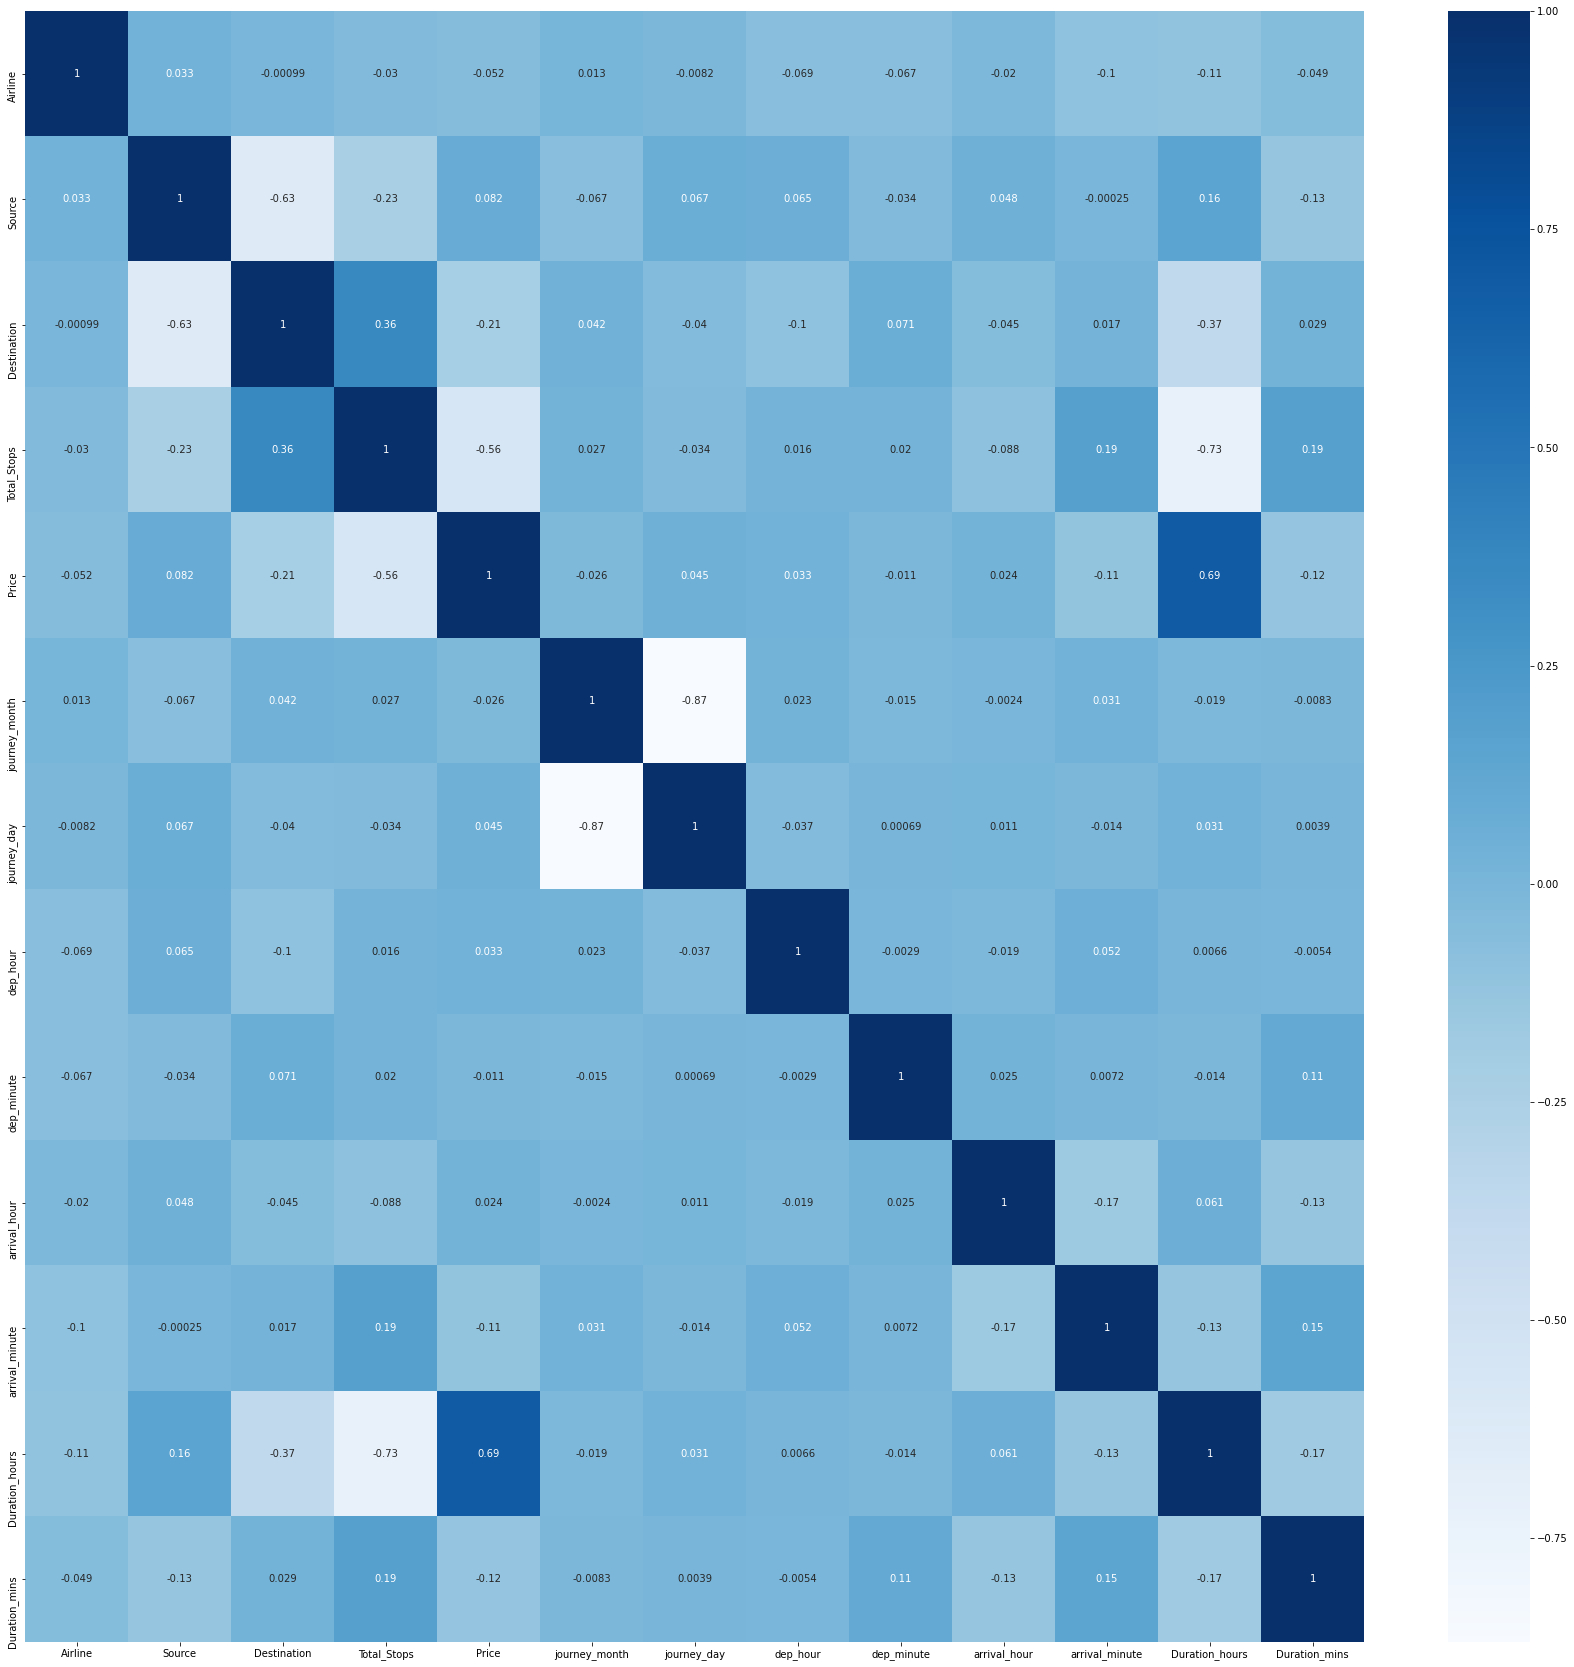

In [30]:
plt.figure(figsize=(30,30))
sns.heatmap(df_new.corr(),annot=True,cmap="Blues")
plt.show()

CHECKING FOR VIF FACTOR

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df_new.iloc[:,df_new.columns != 'Price']
x

,Airline,Source,Destination,Total_Stops,journey_month,journey_day,dep_hour,dep_minute,arrival_hour,arrival_minute,Duration_hours,Duration_mins
0,3,0,1.791759,1.386294,2.079442,2,22,20,1,10,1.098612,50
1,1,3,0.000000,0.693147,2.079442,2,5,50,13,15,2.079442,25
2,4,2,0.693147,0.693147,2.079442,2,9,25,4,25,2.995732,0
3,3,3,0.000000,0.000000,2.079442,2,18,5,23,30,1.791759,25
4,3,0,1.791759,0.000000,2.079442,2,16,50,21,35,1.609438,45
...,...,...,...,...,...,...,...,...,...,...,...,...
2294,4,2,0.693147,0.000000,1.098612,27,19,15,4,25,2.302585,10
2296,8,3,0.000000,1.386294,1.098612,27,17,10,19,40,1.098612,30
2297,1,0,1.791759,0.000000,1.098612,27,10,30,22,55,2.564949,25
2298,9,0,1.098612,1.386294,1.098612,27,11,30,14,20,1.098612,50


In [32]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [33]:
calc_vif(x)

,variable,VIF factor
0,Airline,4.147361
1,Source,5.758434
2,Destination,4.773970
3,Total_Stops,3.565271
4,journey_month,21.150553
5,journey_day,7.236693
6,dep_hour,5.600440
7,dep_minute,2.731219
8,arrival_hour,4.730657
9,arrival_minute,3.447846


STANDARD SCALER METHOD

In [34]:
from sklearn.preprocessing import StandardScaler          
scale=StandardScaler()                                    
x=scale.fit_transform(x)
x

array([[-0.4290138 , -1.64806187,  1.90253369, ..., -0.87658507,
        -1.1913039 ,  1.25706903],
       [-1.33171788,  0.91579973, -1.33236234, ..., -0.57497157,
        -0.00464887, -0.21186994],
       [ 0.02233824,  0.0611792 , -0.08093373, ...,  0.02825544,
         1.10392432, -1.68080892],
       ...,
       [-1.33171788, -1.64806187,  1.90253369, ...,  1.83793647,
         0.58274215, -0.21186994],
       [ 2.27909844, -1.64806187,  0.65110508, ..., -0.27335806,
        -1.1913039 ,  1.25706903],
       [ 0.92504232,  0.0611792 , -0.08093373, ...,  1.53632297,
         0.38063198,  1.25706903]])

In [35]:
y=df_new.iloc[:,4]
y

0        3897.0
1        7662.0
2       13882.0
3        6218.0
4       13302.0
         ...   
2294    14053.0
2296     3841.0
2297    11003.0
2298     5403.0
2299    15342.0
Name: Price, Length: 2263, dtype: float64

MACHINE LEARNING PROCESS

CHOOSING THE BEST RANDOM STATE

In [37]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i) 
    m=RandomForestRegressor()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.6158820019623108 on random state 17


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=17)

In [39]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",r2_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    mse=mean_squared_error(pred_test,y_test)
    rmse=math.sqrt(mse)
    print("error=",rmse,"\n")

testing score= 0.015695451028415963
training score= 0.48721251201749305
error= 2846.892835376475 

testing score= 0.5585336118750016
training score= 0.9399256818253108
error= 2735.6427618885796 

testing score= -4707.999978158886
training score= -0.012164231920579471
error= 3900.9816882414966 

testing score= 0.6163274172677906
training score= 0.9016877279965159
error= 2254.776352556883 

testing score= 0.3363820380619936
training score= 0.6580949729123236
error= 2776.7465145185683 



CROSS VALIDATION PROCESS

In [40]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    score=cross_val_score(i,x,y,cv=5) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [0.4644202  0.49457716 0.47631029 0.42974264 0.53153178]
mean_score= 0.47931641089880594
std= 0.033609010572913815 

score= [0.2355441  0.43418315 0.50020844 0.39972972 0.40305396]
mean_score= 0.39454387558264753
std= 0.0873115282506914 

score= [-0.01583984  0.00574642  0.01153649 -0.05354159 -0.01424414]
mean_score= -0.013268531869533206
std= 0.02283129599934037 

score= [0.59616445 0.57366359 0.67393035 0.64173085 0.61579572]
mean_score= 0.620256991836985
std= 0.034966425447914576 

score= [0.45480876 0.4658493  0.57102851 0.4884319  0.54755489]
mean_score= 0.5055346727431329
std= 0.0458163598209239 



HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
parameters={"criterion":["squared_error","absolute_error", "poisson"],"warm_start":[True,False],"bootstrap": [True,False], "max_features": ["auto","sqrt","log2"]}

In [44]:
gcv=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [45]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'warm_start': [True, False]})

In [46]:
gcv.best_params_

{'bootstrap': True,
 'criterion': 'poisson',
 'max_features': 'sqrt',
 'warm_start': True}

In [47]:
final_model=RandomForestRegressor(bootstrap=True,criterion="poisson",max_features="sqrt",warm_start=True)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(r2_score(pred,y_test))
print("score=",final_model.score(x_train,y_train))
mse=mean_squared_error(pred,y_test)
rmse=math.sqrt(mse)
print(rmse)

0.4354399378249234
score= 0.8951816028175787
2460.624218955092


SAVING THE BEST MODEL

In [48]:
import joblib

joblib.dump(final_model,"flight_price_internship.obj")

['flight_price_internship.obj']

In [49]:
flight_price_internship_from_joblib=joblib.load("flight_price_internship.obj")
flight_price_internship_from_joblib.predict(x_test)

array([11475.22702381,  9597.27483333,  8756.178     ,  9977.1025    ,
        5723.6065    , 10016.32333333, 15586.25      , 12343.74      ,
        9863.16158333,  8263.24266667,  5961.79066667, 10076.51333333,
        9710.35333333, 12246.38745238,  5179.006     ,  6247.4475    ,
        4447.48096104, 11801.9825    ,  4744.37464286, 11959.01564286,
        4148.0125    ,  9911.26111905,  5976.8625    , 12218.977     ,
       11457.13983333, 10827.74333333,  4699.05166667, 10811.3555    ,
        4581.08471429, 12826.36333333, 11714.85      , 10740.64866667,
       12375.05829762,  8481.24642857, 13708.79287879, 13935.86255556,
        2542.44975   ,  4184.4525    ,  4626.01209524,  7199.3979881 ,
       10476.2555    ,  9446.21083333,  5261.66666667,  9386.742     ,
        8369.91583333, 11412.29516667,  2902.765     ,  4227.26047619,
       11714.85      ,  7190.2275    ,  8064.83733333,  9431.90333333,
        9294.06333333, 14495.96166667,  6088.23066667,  9603.805     ,
      